# Use CDF to Calculate Probabilities (Practice)
We will use the human height data set:

Use the normal cumulative distribution function with the mean and standard deviation of female height to calculate the probability that a female's height is:

1. between 55.0 and 56.0 inches

2. is less than 5 feet (60 in)

3. is greater than the mean (hint: do you know this answer intuitively?)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('weight-height - weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
males = df.loc[ df['Gender'] == 'Male'].copy()
females = df.loc[ df['Gender'] == 'Female'].copy()

In [4]:
data = females['Height']

In [5]:
low_end = 55.0
high_end = 56.0

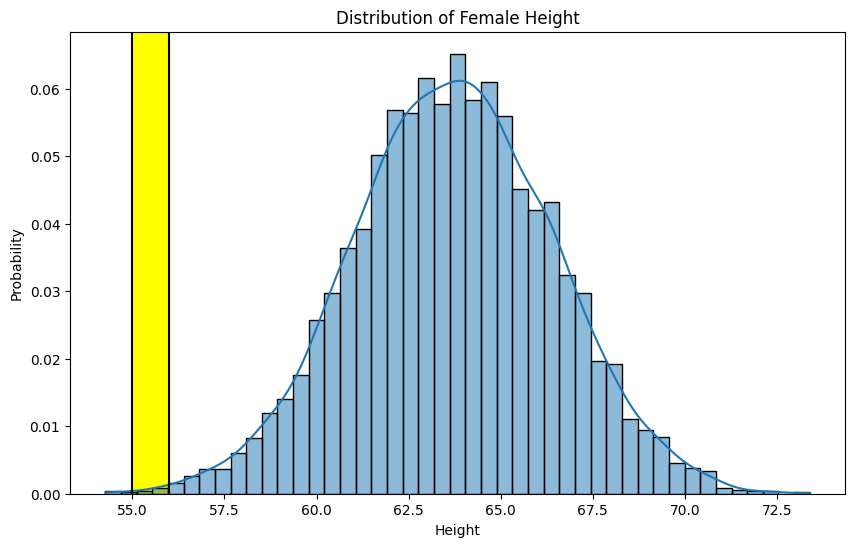

In [6]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='probability',kde=True)
ax.set_title('Distribution of Female Height')
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0);

In [7]:
mean = np.mean(data)
std = np.std(data)
min = np.min(data)
max = np.max(data)

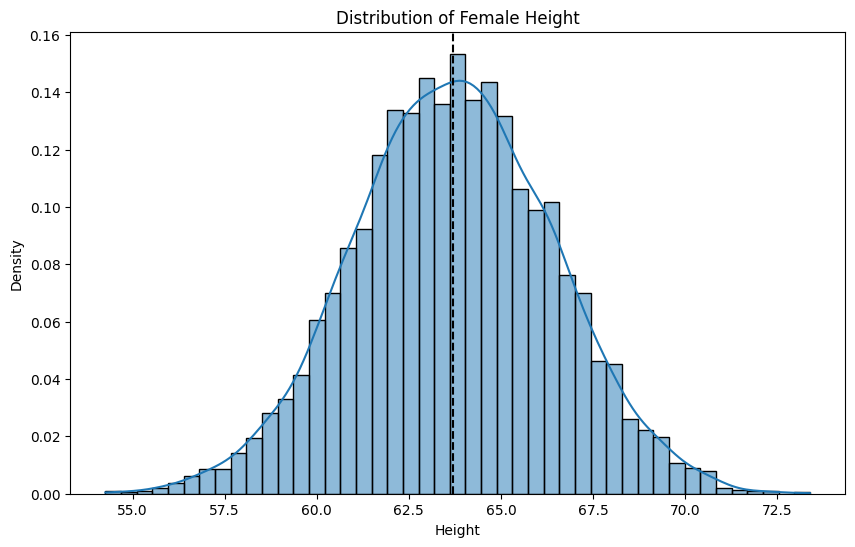

In [8]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True,cumulative=False)
ax.set_title('Distribution of Female Height')
ax.axvline(mean,color='k',ls='--');

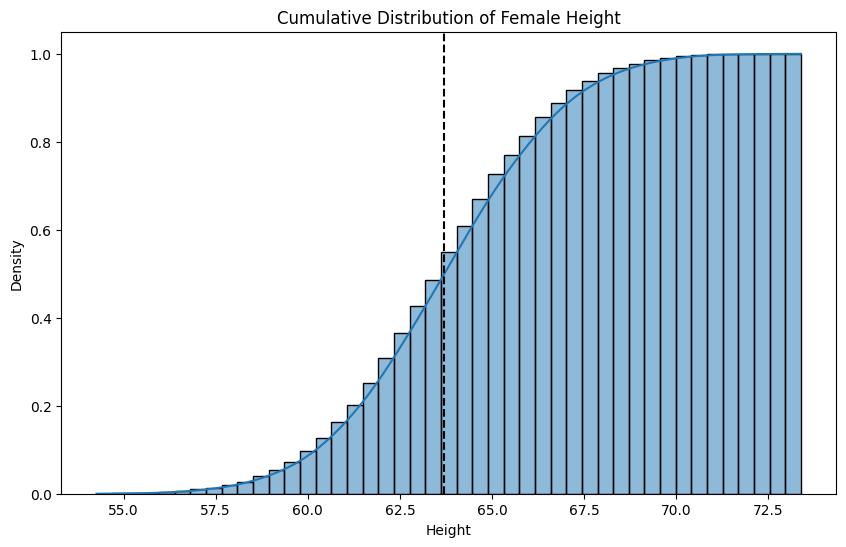

In [9]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True,cumulative=True)
ax.set_title('Cumulative Distribution of Female Height')
ax.axvline(mean,color='k',ls='--');


In [10]:
# Set the range and spacing for our normal curve
x_range = np.linspace(min, max,1000)
pdf = stats.norm.pdf(x_range, loc=mean, scale=std)

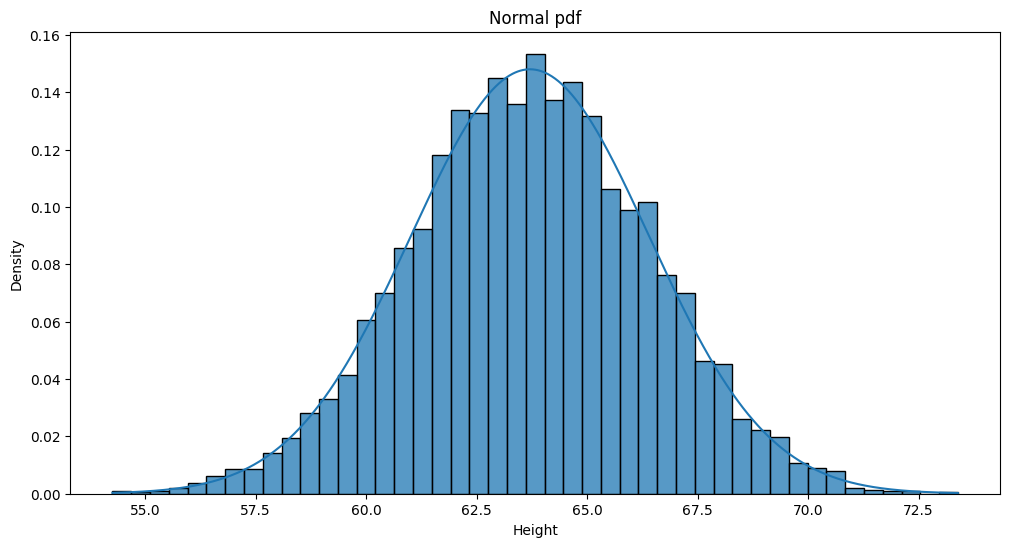

In [11]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density')
ax.plot(x_range,pdf)
ax.set_title('Normal pdf');

In [12]:
cdf = stats.norm.cdf(x_range, loc=mean, scale=std)

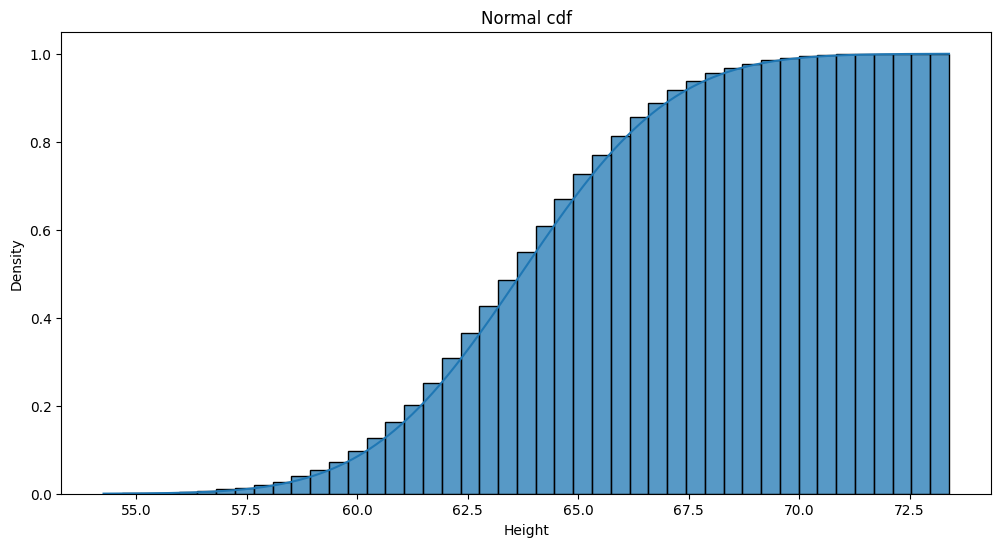

In [13]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range,cdf)
ax.set_title('Normal cdf');

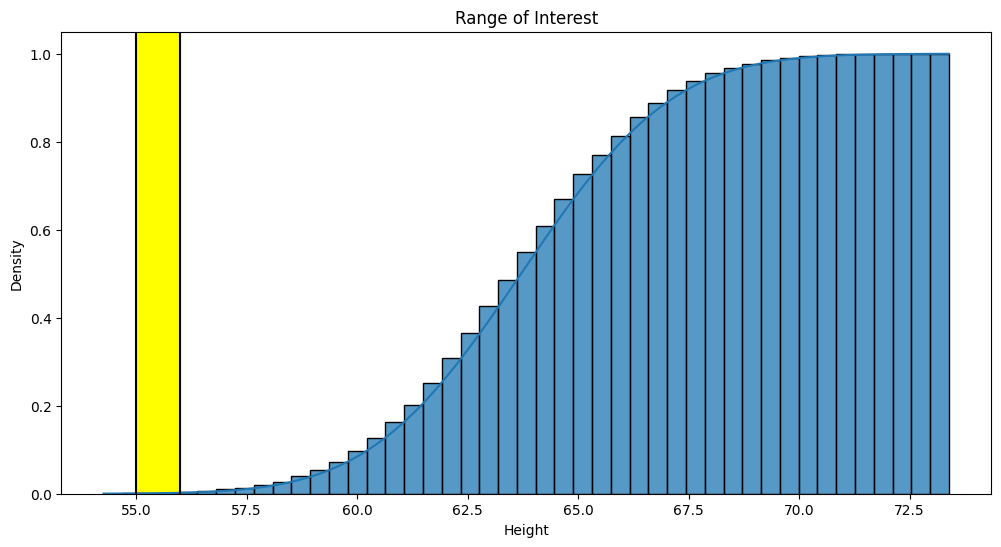

In [14]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range,cdf)
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0)
ax.set_title('Range of Interest');

In [15]:
## we subtract to find the probability of a value occurring in the range
stats.norm.cdf(high_end, loc=mean,scale=std) - stats.norm.cdf(low_end,loc=mean, scale=std)

0.0015043054289559745

There is a .01% chance that female height occur aroung this range

In [16]:
#Calculate probability of height below 60 inches
stats.norm.cdf(60, loc=mean,scale=std)

0.0844649272520746

There is an 8% chance the female heights are under 60 inches

In [18]:
#Calcualte the probability of height above 60 inches
1 -stats.norm.cdf(60, loc=mean,scale=std)

0.9155350727479254

There is an 91% chance the female heights are greater than 60 inches